# Table of Contents
- [Project Description](#Project)
    * [Data Description and goals](#dataset)
    * [Importing Libraries](#libraries)
1. [Opening and Checking data](#read)
    * [Conclusion](#Conclusion)
2. [Preprocessing data](#preprocess)
    * [Processing missing values](#null)
    * [Processing duplicates](#duplicates)
    * [Cancelled items](#cancelled)
    * [Making new Columns](#newcolumns)
    * [Lemmatization](#lemmatize)
    * [Categorizing items](#categorizing)
    * [Seasons](#seasons)
    * [Conclusion](#Conclusion1)
3. [EDA](#analyze)
    * [Top Category](#category)
    * [Top Products in quantity](#quantity)
    * [Top products in price](#price)
    * [Top Customers](#customer)
    * [Conclusion](#Conclusion2)
4. [Customer distribution, revenue, LTV](#step4)
    * [Distribution 2019](#distribute2019)
    * [Distribution 2018](#distribute2018)
    * [Top products over time](#overtime)
    * [Total revenue](#revenue)
    * [LTV](#ltv)
5. [Statistical differences?](#statdiff)
6. [General Conclusions](#Conclusion4)
7. [Presentation Link](#presentation)

# Breakdown of data, questions needed to be asked, and steps to be taken:
<a id="dataset"></a>

#### Dataset contains

- InvoiceNo — order identifier
- StockCode — item identifier
- Description — item name
- Quantity
- InvoiceDate — order date
- UnitPrice — price per item
- CustomerID

#### Steps
- Check for missing values
-- Missing values in Description and CustomerID columns
- Check for duplicates
- Find amount of cancelled products
- Change data types
- Make month, week, and day columns
- Categorize the products
-- Some products can be in the same category
- lemmitization of the description of products

#### Working with Data 2018 vs. 2019
- Find top products in quantity
- Find top categories
- Find top products in price
- Find what the average price with product
- Find top customers and what products are bought by those top customers
- For Customer with lots of orders find the distribution of the number of products that were ordered
- Compare total revenue with season

#### Working with Data from Winter vs. Summer season
- Find top products in quantity
- Find top categories
- Find top products in price
- Find average price per product
- Find top customers and what products are bought by those top customers
- For Customer with lots of orders find the distribution of the number of products that were ordered
- Compare total revenue with season


#### Working with full dataset
- Check if product qauntity changed over time in orders
- Check LTV, Loyal customers, Lowpayers/Highpayers, individuals or companies, one-time or loyal customers
- For each of the category you can make a "profile"  - what these users buy, what's their average, their revenue.  You can make a typical "basket" for each category. This profile will allow company to make better recommendations for customers.

- Check if there is any statistical difference between the products that were determined best for holidays and the products determined best for summer
- Check if there is any statistical difference between 2018 and 2019 Christmas season in sales

- Make a recommendation about which products should be put out there more in the store and which products may have slowed down on the market

In [1]:
#!pip install -U textblob

<a id="libraries"></a>

In [2]:
#Uploading Libraries
import pandas
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from math import factorial
from scipy import stats as st
import datetime
from datetime import datetime
import math
import plotly.graph_objs as go
import plotly.express as px
import plotly.offline as po
from plotly.offline import iplot
import nltk
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
import warnings;
warnings.filterwarnings('ignore')

# Step 1: Read the data
<a id="read"></a>

In [3]:
source_dir = 'B:\Yandex\projects\FinalProject\\'

In [4]:
try:
    df = pd.read_csv(source_dir + 'ecommerce_dataset_us.csv', sep='\t', 
                     parse_dates=['InvoiceDate'], 
                 dtype={'CustomerID': 'object'})
except:
    df = pd.read_csv('ecommerce_dataset_us.csv', sep='\t',
                     parse_dates=['InvoiceDate'], 
                 dtype={'CustomerID': 'object'})

In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 08:26:00,2.55,17850
1,536365,71053,WHITE METAL LANTERN,6,2018-11-29 08:26:00,3.39,17850
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-11-29 08:26:00,2.75,17850
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-11-29 08:26:00,3.39,17850
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-11-29 08:26:00,3.39,17850


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 28.9+ MB


- Changed the datatypes already when reading the data
- There are missing values in Description and CustomerID columns

In [7]:
df.columns=df.columns.str.lower()

In [8]:
df['description'] = df['description'].str.lower()

In [9]:
df.describe(include='object').T

,count,unique,top,freq
invoiceno,541909,25900,573585,1114
stockcode,541909,4070,85123A,2313
description,540455,4206,white hanging heart t-light holder,2369
customerid,406829,4372,17841,7983


- There are 25900 unique invoiceno but only 4372 unique customerid. That means 4372 unique customers had 25900 orders all together
- Within those orders there are only 4206 unique items in our store though we have some missing description
- stockcode for the items is even less than the description which is weird because stockcode is supposed to identify the item. Must be there are weird descriptions in the data

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
unitprice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0


- Looks like we have negative numbers here. And the maximum quantity and price is way above the usual. We may be looking at some outliers that we will need to get rid of for us to work on the data appropopriately.
- The standard deviation is also very high.

In [11]:
df_80995 = df.query('quantity == 80995.0')
df_80995

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid
540421,581483,23843,"paper craft , little birdie",80995,2019-12-07 09:15:00,2.08,16446


In [12]:
paper_craft = df.query('description == "paper craft , little birdie"')
paper_craft

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid
540421,581483,23843,"paper craft , little birdie",80995,2019-12-07 09:15:00,2.08,16446
540422,C581484,23843,"paper craft , little birdie",-80995,2019-12-07 09:27:00,2.08,16446


In [13]:
df_38970 = df.query('unitprice == 38970.0')
df_38970

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid
222681,C556445,M,manual,-1,2019-06-08 15:31:00,38970.0,15098


In [14]:
manual = df.query('description == "manual"')
manual

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid
2239,536569,M,manual,1,2018-11-29 15:35:00,1.25,16274
2250,536569,M,manual,1,2018-11-29 15:35:00,18.95,16274
5684,536865,M,manual,1,2018-12-01 11:28:00,2.55,NaN
6798,536981,M,manual,2,2018-12-01 14:26:00,0.85,14723
7976,537077,M,manual,12,2018-12-03 11:59:00,0.42,17062
...,...,...,...,...,...,...,...
531432,580956,M,manual,4,2019-12-04 14:23:00,1.25,17841
533082,C581009,M,manual,-1,2019-12-05 09:15:00,125.00,16971
534308,C581145,M,manual,-1,2019-12-05 13:48:00,9.95,17490
538321,581405,M,manual,3,2019-12-06 13:50:00,0.42,13521


- Both these paper craft and manual are not exactly helpful for our products. Paper craft was actually cancelled it looks like with the negative number there. Manual unitprices fluctuate so much that I wonder if they are just packaged with whatever item they are coming with and a few of them are cancelled items.

# Step 2: Preprocessing
<a id="preprocess"></a>
- Check for missing values
-- Missing values in Description and CustomerID columns
- Check for duplicates
- Change data types
- Make month, week, and day columns
- Categorize the products
-- Some products can be in the same category
- lemmitization of the description of products


### Missing values
<a id="null"></a>

In [15]:
df.isnull().sum()

invoiceno           0
stockcode           0
description      1454
quantity            0
invoicedate         0
unitprice           0
customerid     135080
dtype: int64

In [16]:
1454/541909

0.002683107311375157

In [17]:
135080/541909

0.249266943342886

 Two columns are missing data in them. Description column and CustomerID.
- Description column is less than a percent of the data. 
- CustomerId is 24% of our data
- Will drop these missing values because we have plenty more data to analyze but will check them nonetheless

In [18]:
df[df.isnull().any(axis=1)]

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid
622,536414,22139,NaN,56,2018-11-29 11:52:00,0.00,NaN
1443,536544,21773,decorative rose bathroom bottle,1,2018-11-29 14:32:00,2.51,NaN
1444,536544,21774,decorative cats bathroom bottle,2,2018-11-29 14:32:00,2.51,NaN
1445,536544,21786,polkadot rain hat,4,2018-11-29 14:32:00,0.85,NaN
1446,536544,21787,rain poncho retrospot,2,2018-11-29 14:32:00,1.66,NaN
...,...,...,...,...,...,...,...
541536,581498,85099B,jumbo bag red retrospot,5,2019-12-07 10:26:00,4.13,NaN
541537,581498,85099C,jumbo bag baroque black white,4,2019-12-07 10:26:00,4.13,NaN
541538,581498,85150,ladies & gentlemen metal sign,1,2019-12-07 10:26:00,4.96,NaN
541539,581498,85174,s/4 cacti candles,1,2019-12-07 10:26:00,10.79,NaN


- Looks like some invoiceno are the same with the customerid that is missing like invoiceno 581498
- That is a large unitprice number compared to every thing else by Index 541540 of 1714.17
- There seems to be some unitprice with 0.00. Maybe those were for free but the description is also empty and customerid. Must be some kind of technical error with those. Will need to check further
- There are very similar items but with different features and the stockcode addresses that. For example 21773 and 21774 are the same bathroom bottle but decorated differently by Roses or Cats. And then you have the Jumbo bag with different color styles as 85099B and 85099C. Will need to explore those differences more and bunch some of those items in similar groups. Unitprice is the same for them.
- DOTCOM POSTAGE. That isn't an item but shipping. We probably don't need that information for what we are looking for

### Checking description column missing values

In [19]:
missing_description = df.query('description != description')
missing_description['unitprice'].value_counts()

0.0    1454
Name: unitprice, dtype: int64

- So all of the missing values in description have no unitprice. So either they are free products which will not help us when it comes to revenue or they were mistakes in the data. I will drop the missing description values

In [20]:
df[df.unitprice==0]['description'].value_counts()

check                     162
damaged                    58
?                          47
damages                    46
found                      34
                         ... 
found in w/hse              1
wet/mouldy                  1
milk pan pink polkadot      1
can't find                  1
found box                   1
Name: description, Length: 360, dtype: int64

- Yes. Looks like these are mostly not items but random descriptions of damages and such and therefore would not have a price on them. 

### Checking customerid column missing values

In [21]:
description_amazon=df.query('description == "amazon"')
description_amazon

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid
6391,536941,22734,amazon,20,2018-12-01 12:08:00,0.0,NaN
6392,536942,22139,amazon,15,2018-12-01 12:08:00,0.0,NaN
15651,537639,22734,amazon,30,2018-12-05 15:29:00,0.0,NaN
24290,538348,22734,amazon,30,2018-12-08 14:59:00,0.0,NaN
311177,564229,82583,amazon,20,2019-08-22 10:20:00,0.0,NaN
314575,564645,82583,amazon,44,2019-08-24 13:38:00,0.0,NaN
344080,566982,85049B,amazon,1,2019-09-14 10:15:00,0.0,NaN
344081,566983,23084,amazon,1,2019-09-14 10:16:00,0.0,NaN
418125,572697,22087,amazon,6,2019-10-23 14:24:00,0.0,NaN
418126,572698,82613A,amazon,1,2019-10-23 14:25:00,0.0,NaN


- all of the data that describes amazon has no unitprice or customerid. 

In [22]:
description_postage=df.query('description == "dotcom postage"')
description_postage

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid
1814,536544,DOT,dotcom postage,1,2018-11-29 14:32:00,569.77,NaN
3041,536592,DOT,dotcom postage,1,2018-11-29 17:06:00,607.49,NaN
5450,536862,DOT,dotcom postage,1,2018-12-01 11:13:00,254.43,NaN
5545,536864,DOT,dotcom postage,1,2018-12-01 11:27:00,121.06,NaN
5685,536865,DOT,dotcom postage,1,2018-12-01 11:28:00,498.47,NaN
...,...,...,...,...,...,...,...
536834,581219,DOT,dotcom postage,1,2019-12-06 09:28:00,1008.96,NaN
537254,581238,DOT,dotcom postage,1,2019-12-06 10:53:00,1683.75,NaN
539368,581439,DOT,dotcom postage,1,2019-12-06 16:30:00,938.59,NaN
540908,581492,DOT,dotcom postage,1,2019-12-07 10:03:00,933.17,NaN


- This definitely looks like postage stamps and there is no customerid number. It does have an attached invoiceno though. Will see if these get dropped when dropping missing values

### Dropping missing values

In [23]:
df_missing_clean = df.dropna()

In [24]:
description_postage=df_missing_clean.query('description == "dotcom postage"')
description_postage

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid
317507,564764,DOT,dotcom postage,1,2019-08-28 10:49:00,11.17,14096
324002,565383,DOT,dotcom postage,1,2019-08-31 15:45:00,16.46,14096
333755,566217,DOT,dotcom postage,1,2019-09-07 15:17:00,13.16,14096
338829,566566,DOT,dotcom postage,1,2019-09-11 12:32:00,85.58,14096
350599,567656,DOT,dotcom postage,1,2019-09-19 14:40:00,878.55,14096
361584,568346,DOT,dotcom postage,1,2019-09-24 15:28:00,688.08,14096
372766,569246,DOT,dotcom postage,1,2019-10-01 09:57:00,490.25,14096
389983,570488,DOT,dotcom postage,1,2019-10-08 17:12:00,635.01,14096
401766,571441,DOT,dotcom postage,1,2019-10-15 13:31:00,743.62,14096
416463,572552,DOT,dotcom postage,1,2019-10-22 17:07:00,638.30,14096


- Looks like customer 14096 still is in the data with dotcom posatge. And they spend much more towards the end of the year in postage

- I am getting rid of postage and manuals from the dataset because they don't constitute actual products that customers would be looking for.

In [25]:
#dropping postage rows
df_missing_clean= df_missing_clean[df_missing_clean.description != 'postage']

In [26]:
df_missing_clean= df_missing_clean[df_missing_clean.description != 'dotcom postage']

In [27]:
df_missing_clean= df_missing_clean[df_missing_clean.description != 'manual']

### Conclusion
- Seems like there are a lot of weird descriptions which affect the customerid and description. This data will not help us with product range so it will be dropped. We will still have plenty of products to work with

### Duplicates
<a id="duplicates"></a>

In [28]:
print('Amount of duplicated data:',df_missing_clean.duplicated().sum())

Amount of duplicated data: 5220


In [29]:
5225/541909

0.009641840235168635

- The amount of duplicate data is less than a percent of the data we have

In [30]:
df_missing_clean.loc[df_missing_clean.duplicated(), :]

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid
517,536409,21866,union jack flag luggage tag,1,2018-11-29 11:45:00,1.25,17908
527,536409,22866,hand warmer scotty dog design,1,2018-11-29 11:45:00,2.10,17908
537,536409,22900,set 2 tea towels i love london,1,2018-11-29 11:45:00,2.95,17908
539,536409,22111,scottie dog hot water bottle,1,2018-11-29 11:45:00,4.95,17908
555,536412,22327,round snack boxes set of 4 skulls,1,2018-11-29 11:49:00,2.95,17920
...,...,...,...,...,...,...,...
541675,581538,22068,black pirate treasure chest,1,2019-12-07 11:34:00,0.39,14446
541689,581538,23318,box of 6 mini vintage crackers,1,2019-12-07 11:34:00,2.49,14446
541692,581538,22992,revolver wooden ruler,1,2019-12-07 11:34:00,1.95,14446
541699,581538,22694,wicker star,1,2019-12-07 11:34:00,2.10,14446


In [31]:
data_clean = df_missing_clean.drop_duplicates().reset_index(drop = True)

In [32]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399932 entries, 0 to 399931
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   invoiceno    399932 non-null  object        
 1   stockcode    399932 non-null  object        
 2   description  399932 non-null  object        
 3   quantity     399932 non-null  int64         
 4   invoicedate  399932 non-null  datetime64[ns]
 5   unitprice    399932 non-null  float64       
 6   customerid   399932 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 21.4+ MB


In [33]:
401604/541909

0.7410912164219454

- We still have 74% of the data to work with after dropping the missing values and duplicates

### Checking for any oddity in the quantities of items
<a id="cancelled"></a>

- Negative numbers? And not just negative numbers. There are huge numbers here. 80995 quantity of something?

In [34]:
data_quantities = data_clean.pivot_table(index = ['description'], values = 'quantity', aggfunc = ('sum'))
data_quantities.sort_values(by = 'quantity', ascending= False)

,quantity
description,
world war 2 gliders asstd designs,53119
jumbo bag red retrospot,44963
assorted colour bird ornament,35215
white hanging heart t-light holder,34128
pack of 72 retrospot cake cases,33386
...,...
pink poodle hanging decoration,-12
cruk commission,-16
assorted tutti frutti round box,-24


In [35]:
data_80995 = data_clean.query('quantity == 80995')
data_80995

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid
399465,581483,23843,"paper craft , little birdie",80995,2019-12-07 09:15:00,2.08,16446


In [36]:
paper_craft = data_clean.query('description == "paper craft , little birdie"')
paper_craft

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid
399465,581483,23843,"paper craft , little birdie",80995,2019-12-07 09:15:00,2.08,16446
399466,C581484,23843,"paper craft , little birdie",-80995,2019-12-07 09:27:00,2.08,16446


In [37]:
data_clean['invoiceno'].value_counts()

576339     541
579196     532
580727     528
578270     441
573576     434
          ... 
C562915      1
C573767      1
C569902      1
C569942      1
C566472      1
Name: invoiceno, Length: 21883, dtype: int64

In [38]:
C572119 = data_clean.query('invoiceno == "C572119"')
C572119

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid
301538,C572119,84946,antique silver t-light glass,-2,2019-10-18 19:23:00,1.25,15598


In [39]:
C544080 = data_clean.query('invoiceno == "C544080"')
C544080

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid
57532,C544080,22423,regency cakestand 3 tier,-4,2019-02-13 15:46:00,10.95,17819


In [40]:
C540895 = data_clean.query('invoiceno == "C540895"')
C540895

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid
33452,C540895,21217,red retrospot round cake tins,-1,2019-01-10 11:45:00,9.95,17095


- These three indicate I found the cancelled orders and that is why there are negative in quantities

- Well the reason why there are negative numbers is because of cancelled orders. The C at the beginning of an invoice order is telling us its a cancelled order. 

### Find amount of cancelled products

In [41]:
check = 'C'
cancelled_items = [idx for idx in data_clean['invoiceno'] if idx.lower().startswith(check.lower())]

In [42]:
len(cancelled_items)

8600

- There are 8600 cancelled items in the data. 

In [43]:
#dropping cancelled products
data_clean = data_clean[data_clean['invoiceno'].str[0] != 'C']

In [44]:
data_clean = data_clean[data_clean['quantity'] != 80995]

In [45]:
data_clean = data_clean

- considered cancelling it out but it gets cancelled out on its own in the calculations because they are both in the data
- But then decided to drop them to get rid of the negative values in our dataset and dropped paper craft, little birdie knowing it was cancelled and one invoice with a huge quantity

In [46]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 391331 entries, 0 to 399931
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   invoiceno    391331 non-null  object        
 1   stockcode    391331 non-null  object        
 2   description  391331 non-null  object        
 3   quantity     391331 non-null  int64         
 4   invoicedate  391331 non-null  datetime64[ns]
 5   unitprice    391331 non-null  float64       
 6   customerid   391331 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 23.9+ MB


In [47]:
391332 /541909

0.7221360043845

- We still have 72% of the dataset

### Making Month, week, and day columns
<a id="newcolumns"></a>

In [48]:
data_clean['year'] = pd.DatetimeIndex(data_clean['invoicedate']).year

In [49]:
data_clean['month'] = pd.DatetimeIndex(data_clean['invoicedate']).month

In [50]:
data_clean['week'] = pd.DatetimeIndex(data_clean['invoicedate']).week

In [51]:
data_clean['weekday'] = data_clean['invoicedate'].dt.weekday

In [52]:
data_clean['date'] = pd.DatetimeIndex(data_clean['invoicedate']).date

### Adding total price column of orders of items

In [53]:
data_clean['total_price'] = data_clean['quantity'] *data_clean['unitprice']

### Adding first order date for customers

In [54]:
first_invoice_date_by_customers = data_clean.groupby('customerid')['date'].min() 

In [55]:
first_invoice_date_by_customers.name = 'first_invoice_date'

In [56]:
data_clean = data_clean.join(first_invoice_date_by_customers,on='customerid')

## Categorizing and lemmatization 
<a id="lemmatize"></a>

### Categorizing by items
<a id="categorizing"></a>

In [57]:
print(len(data_clean['stockcode'].unique()))

3661


In [58]:
4070 - 3681

389

- So we lost 389 stockcode numbers. And 360 were messy descriptions. 

In [59]:
print(len(data_clean['description'].unique()))

3873


In [60]:
4206 - 3893

313

- And 313 descriptions. Do some descriptions have the same stockcode?

In [61]:
data_clean['description'].value_counts().head(50)

white hanging heart t-light holder     2016
regency cakestand 3 tier               1714
jumbo bag red retrospot                1615
assorted colour bird ornament          1395
party bunting                          1390
lunch bag red retrospot                1303
set of 3 cake tins pantry design       1152
lunch bag  black skull.                1078
pack of 72 retrospot cake cases        1050
spotty bunting                         1014
paper chain kit 50's christmas         1003
lunch bag spaceboy design               993
heart of wicker small                   979
lunch bag cars blue                     977
natural slate heart chalkboard          972
lunch bag pink polkadot                 941
lunch bag suki design                   915
rex cash+carry jumbo shopper            897
alarm clock bakelike red                886
jumbo bag pink polkadot                 884
wooden picture frame white finish       882
set of 4 pantry jelly moulds            881
jam making set with jars        

- Here are our top 50 descriptions
- We can already see that some have similar descriptions. Like bag, jam making, t-light

In [62]:
#>>> nltk.download('brown')
#>>> nltk.download('wordnet')

In [63]:
data_clean['categories'] = data_clean['description'].apply(lambda words: TextBlob(words).noun_phrases)

In [64]:
data_clean['categories'].value_counts().head(50)

TypeError: unhashable type: 'WordList'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1652, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'WordList'


[]                                      32675
[heart t-light holder]                   2797
[hot water bottle]                       2175
[alarm clock bakelike]                   1869
[jam making]                             1750
[regency cakestand]                      1714
[jumbo bag, red retrospot]               1615
[colour bird ornament]                   1395
[lunch bag, red retrospot]               1303
[cake tins pantry design]                1152
[lunch bag, black skull]                 1078
[edwardian parasol]                      1077
[retrospot tea]                          1070
[lunch bag suki design]                  1063
[retrospot cake cases]                   1050
[paper chain kit, 's christmas]          1003
[lunch bag spaceboy design]               993
[blue metal door]                         992
[lunch bag cars]                          977
[natural slate heart chalkboard]          972
[lunch bag, pink polkadot]                941
[rex cash+carry jumbo shopper]    

In [65]:
from collections import Counter
frequencies = Counter(word for sentence in data_clean['categories'] for word in sentence)
for word, frequency in frequencies.most_common(20):  # get the 10 most frequent words
    print(word, frequency)

red retrospot 5812
hot water bottle 5143
jumbo bag 4250
lunch bag 4048
heart t-light holder 2797
pink polkadot 2787
's christmas 2697
white finish 2373
alarm clock bakelike 1869
jam making 1750
girl design 1731
regency cakestand 1714
colour bird ornament 1395
ceramic drawer knob 1265
round snack boxes 1222
cake tins pantry design 1152
black skull 1078
edwardian parasol 1077
retrospot tea 1070
lunch bag suki design 1063


In [66]:
def lemmatizing(text):
    wordnet_lemma = WordNetLemmatizer()
    words = nltk.word_tokenize(text)
    return [wordnet_lemma.lemmatize(w, pos = 'n') for w in words]
 
data_clean['lemmas'] = data_clean['description'].apply(lemmatizing)

In [67]:
data_clean['lemmas'].value_counts().head(50)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1652, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[white, hanging, heart, t-light, holder]     2016
[regency, cakestand, 3, tier]                1714
[jumbo, bag, red, retrospot]                 1615
[assorted, colour, bird, ornament]           1395
[party, bunting]                             1390
[lunch, bag, red, retrospot]                 1303
[set, of, 3, cake, tin, pantry, design]      1152
[lunch, bag, black, skull, .]                1078
[lunch, bag, suki, design]                   1063
[pack, of, 72, retrospot, cake, case]        1050
[spotty, bunting]                            1014
[paper, chain, kit, 50, 's, christmas]       1003
[lunch, bag, spaceboy, design]                993
[heart, of, wicker, small]                    979
[lunch, bag, car, blue]                       977
[natural, slate, heart, chalkboard]           972
[lunch, bag, pink, polkadot]                  941
[rex, cash+carry, jumbo, shopper]             897
[alarm, clock, bakelike, red]                 886
[jumbo, bag, pink, polkadot]                  884


In [68]:
from collections import Counter
frequencies = Counter(word for sentence in data_clean['lemmas'] for word in sentence)
for word, frequency in frequencies.most_common(20):  # get the 10 most frequent words
    print(word, frequency)

of 40191
set 40160
bag 37668
heart 32880
red 31822
retrospot 26063
vintage 25300
design 23663
pink 20191
box 19884
christmas 18808
cake 17027
white 15759
metal 15681
jumbo 15333
lunch 14709
3 14252
blue 13774
tin 12658
hanging 12646


- t-lights are popular

In [69]:
def product_category(element):
    if 't-light' in element or 'lantern' in element or 'light' in element or 'candle' in element or 'chandelier' in element or 'chair' in element or 'doormat' in element or 'liners' in element or 'cabinet' in element or 'hanger' in element or 'vintage' in element:
        element = 'home and kitchen'
    elif 'cake' in element or 'bunting' in element or 'dish' in element or 'tea' in element or 'bread' in element or 'jar' in element or 'pantry' in element or 'pan' in element or 'bowls' in element or 'mug' in element or 'napkins' in element or 'baking' in element or 'jam' in element or 'kitchen' in element:
        element = 'cooking and baking'
    elif 'neckl' in element or 'bracelet' in element or 'earring' in element or 'ring' in element or 'charm' in element or 'jewellery' in element:
        element = 'jewelry'
    elif 'card' in element or 'scrap book' in element or 'paper craft' in element or 'frame' in element:
        element = 'stationary'
    elif 'bag' in element or 'jumbo' in element:
        element = 'bags'
    elif 'pillow' in element or 'ornament' in element or 'wicker' in element or 'flag' in element or 'wreath' in element or 'snowflake' in element or 'wall art' in element or 'curtain' in element or 'flower' in element or 'sign' in element:
        element = 'decorations'
    elif 'bottle' in element:
        element = 'bottles'
    elif 'lunch' in element:
        element = 'lunch box'
    elif 'christmas' in element or 'snowflake' in element or 'jingle' in element:
        element = 'christmas product'
    elif 'easter' in element:
        element = 'easter product'
    elif 'birthday' in element or 'balloon' in element or 'gift' in element:
        element = 'gifts'
    elif 'hairclip' in element or 'hair' in element or 'comb' in element or 'knitting' in element or 'glasses' in element:
        element = 'styling'
    elif 'clock' in element or 'alarm' in element:
        element = 'clocks'
    elif 'plant' in element or 'grow' in element or 'gardeners' in element:
        element = 'gardening product'
    else:
        element = 'other'
    return element
   
data_clean['product_category'] = data_clean['description'].apply(product_category)

In [70]:
data_clean['product_category'].value_counts()

other                 138110
home and kitchen       62941
cooking and baking     61307
decorations            34193
bags                   32821
stationary             15642
christmas product      11613
jewelry                 8476
bottles                 7918
clocks                  5522
gifts                   3966
lunch box               3306
gardening product       1996
styling                 1910
easter product          1610
Name: product_category, dtype: int64

- After splitting the different items into more categories there seems to be a lot of kitchen products in our data.
- Bags and decorations are popular items. Holiday products for Christmas are at 11613 products and then the next category with 8476 is jewelry

### Categorizing by season
<a id="seasons"></a>

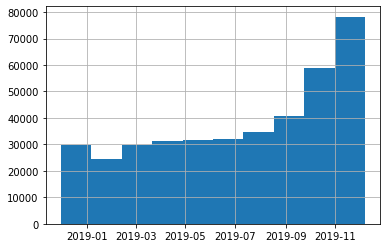

In [71]:
data_clean['invoicedate'].hist()

- Sales were higher during winter season
- Were steady throughout the year
- There is some data from the previous year

## 2018 data

In [72]:
data_2018= data_clean.query('year == 2018')

(array([737027., 737029., 737033., 737037., 737041., 737045., 737049.]),
 <a list of 7 Text xticklabel objects>)

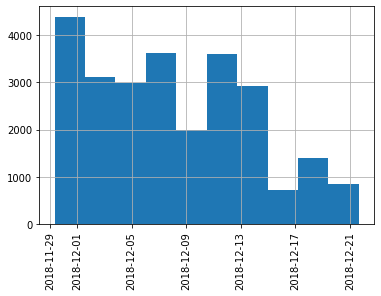

In [73]:
data_2018['invoicedate'].hist()
plt.xticks(rotation=90)

- Looks like all of the data is for the Christmas season in 2018 data.

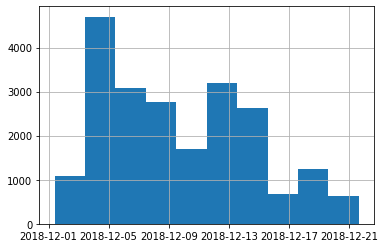

In [74]:
data_12_2018 = data_2018.query('month == "12"')
data_12_2018['invoicedate'].hist()

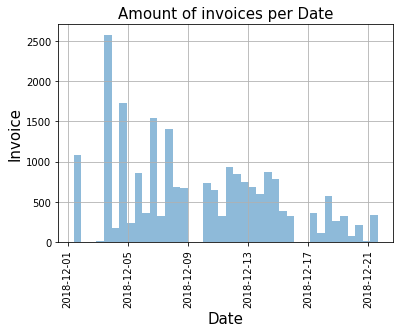

In [75]:
data_12_2018['invoicedate'].hist(bins=40, alpha=0.5);
plt.title("Amount of invoices per Date", fontdict={'size':15})
plt.xlabel('Date', fontdict={'size':15})
plt.ylabel("Invoice",fontdict={'size':15})
plt.xticks(rotation=90);

- We can see there was a lot of invoices in the 12th month of 2018. 

## 2019 data

- I will focus on 2019 data for our categorization and will check the 2019 christmas season against the 2018 christmas season in a hypothesis

In [76]:
data_2019= data_clean.query('year == 2019')

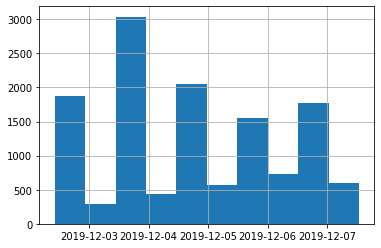

In [77]:
data_12_2019 = data_2019.query('month == "12"')
data_12_2019['invoicedate'].hist()

## Winter Season

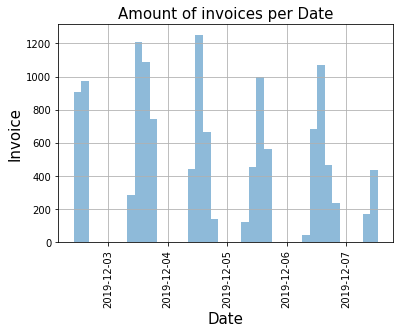

In [78]:
data_12_2019['invoicedate'].hist(bins=40, alpha=0.5);
plt.title("Amount of invoices per Date", fontdict={'size':15})
plt.xlabel('Date', fontdict={'size':15})
plt.ylabel("Invoice",fontdict={'size':15})
plt.xticks(rotation=90);

In [79]:
print(len(data_12_2019['invoiceno'].unique()))

544


- At first glance 2018 did better than 2019 during the month of December before Christmas but we only have data until December 7th 2019 so its not really conclusive

- I am going to look at these specific dates of 2018 and the specific dates of 2019 and compare them in my analysis with the product range during those time periods of the beginning of December for 2018 until December 

In [80]:
data_2018_test= data_12_2018.query('invoicedate <= "2018-12-08"')

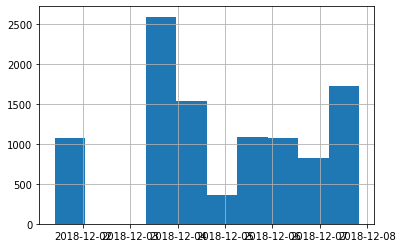

In [81]:
data_2018_test['invoicedate'].hist()

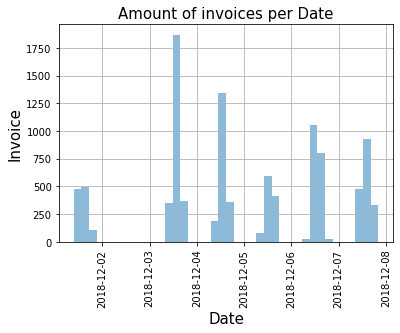

In [82]:
data_2018_test['invoicedate'].hist(bins=40, alpha=0.5);
plt.title("Amount of invoices per Date", fontdict={'size':15})
plt.xlabel('Date', fontdict={'size':15})
plt.ylabel("Invoice",fontdict={'size':15})
plt.xticks(rotation=90);

In [83]:
print(len(data_2018_test['invoiceno'].unique()))

517


### Conclusion
<a id="conclusion1"></a>

- Well the number of invoices from both winter seasons are similar with the data I pulled. 
- I took the week of December 1-8 for both 2018 and 2019 to compare winter seasons.
- I will check ltv based on full data from the whole year

# Step 3: EDA
<a id="analyze"></a>

### Find top categories

In [84]:
categories_2019 = data_12_2019.groupby('product_category')['quantity'].count()

In [85]:
categories_labels = ['other','home and kitchen','cooking and baking','decorations','bags','christmas product', 'stationary',  'bottles','jewelry','clocks','gifts','gardening product','styling', 'lunch box','easter product']   

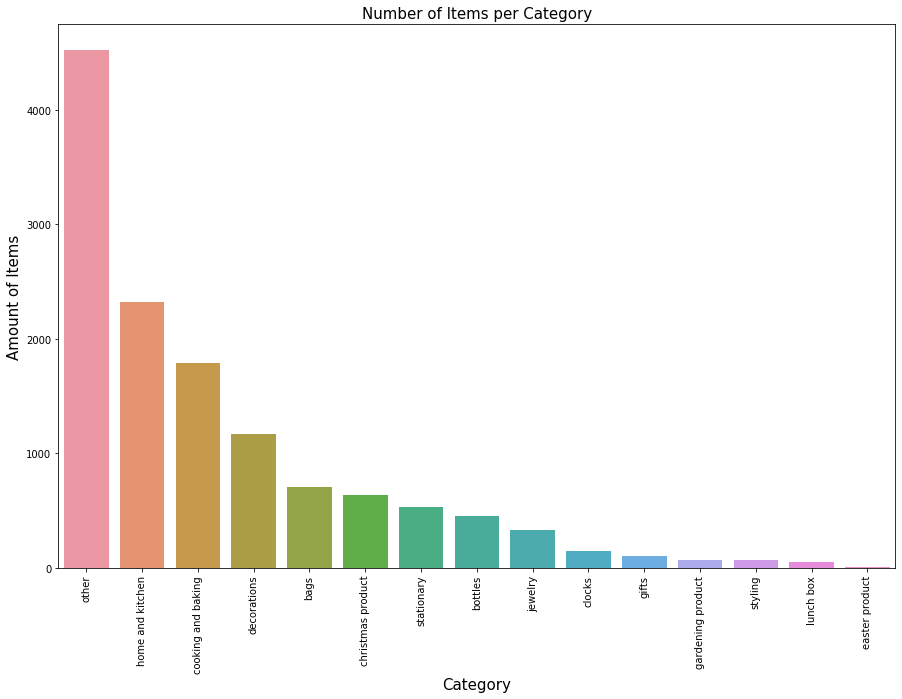

In [86]:
plt.figure(figsize=(15, 10))
ax = sns.barplot(x=categories_labels, y=categories_2019.sort_values(ascending=False), data=data_12_2019)
plt.xticks(rotation=90)
ax.set_title('Number of Items per Category', fontdict={'size': 15})
ax.set_xlabel("Category", fontdict={'size': 15})
ax.set_ylabel("Amount of Items", fontdict={'size': 15})

plt.show()

In [87]:
categories_2018 = data_2018_test.groupby('product_category')['quantity'].count()

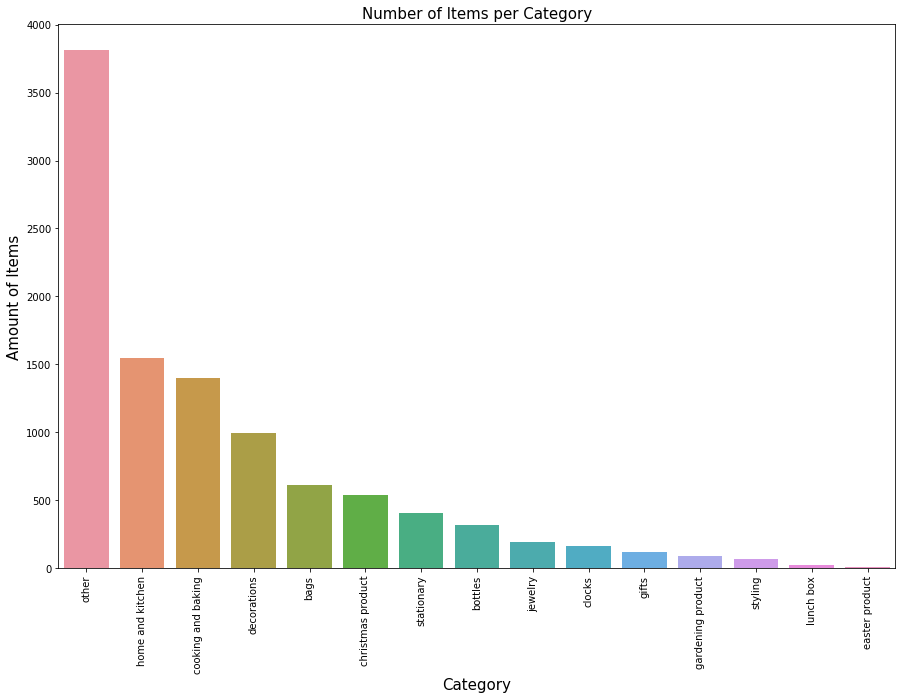

In [88]:
plt.figure(figsize=(15, 10))
ax = sns.barplot(x=categories_labels, y=categories_2018.sort_values(ascending=False), data=data_2018_test)
plt.xticks(rotation=90)
ax.set_title('Number of Items per Category', fontdict={'size': 15})
ax.set_xlabel("Category", fontdict={'size': 15})
ax.set_ylabel("Amount of Items", fontdict={'size': 15})

plt.show()

- 2019 has more items sold but the top categories remains the same for both time periods and the categories themselves seem to be very similar in the order of what was the order of categoreis

### 2019

In [89]:
data_12_2019['product_category'].value_counts().head()

other                 4519
home and kitchen      2318
cooking and baking    1787
decorations           1167
bags                   706
Name: product_category, dtype: int64

### 2018

In [90]:
data_2018_test['product_category'].value_counts().head()

other                 3811
home and kitchen      1547
cooking and baking    1396
decorations            994
bags                   610
Name: product_category, dtype: int64

### Find top products 
<a id="topp"></a>

### 2019

In [91]:
product = data_12_2019.pivot_table(index = ['product_category', 'description'], values = 'quantity', aggfunc = ({'count', 'sum'})).reset_index()
product.columns= ['category', 'description', 'orders', 'quantity']
product.sort_values(by= 'quantity', ascending =False).head(20)

,category,description,orders,quantity
1634,other,popcorn holder,38,3904
832,home and kitchen,rabbit night light,75,2899
515,decorations,metal sign take it or leave it,9,1440
1952,stationary,black record cover frame,18,1400
596,decorations,world war 2 gliders asstd designs,14,1069
1162,other,bicycle puncture repair kit,49,1042
143,christmas product,paper chain kit 50's christmas,72,1010
1246,other,classic bicycle clips,35,984
129,christmas product,disco ball christmas decoration,9,966
1877,other,traditional modelling clay,10,939


In [92]:
top_10_products_quantity_2019 = data_12_2019.pivot_table(index = ['description', 'stockcode'], values = 'quantity', aggfunc = ({'count', 'sum'})).reset_index()
top_10_products_quantity_2019.columns= ['description', 'stockcode', 'count', 'sum']
top_10_products_quantity_2019 = top_10_products_quantity_2019.sort_values(by= 'sum', ascending =False).head(10)

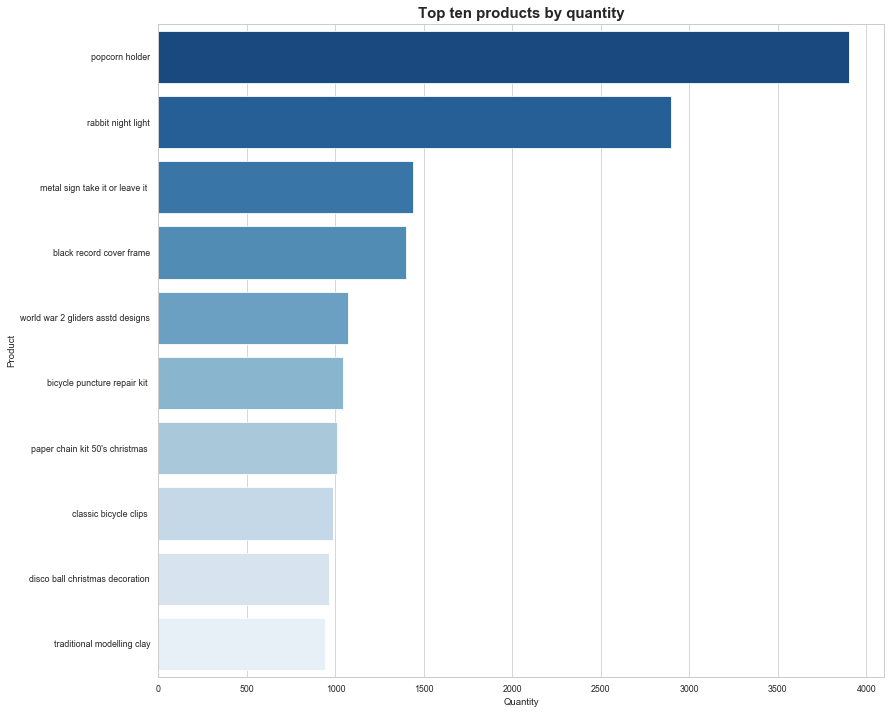

In [93]:
sns.set_context('paper')
sns.set_style('whitegrid')

plt.figure(figsize=(13,12))

sns.barplot(x= 'sum', y='description', data=top_10_products_quantity_2019, palette='Blues_r')

plt.title('Top ten products by quantity', fontsize=15, fontweight='bold')
plt.ylabel('Product')
plt.xlabel('Quantity')
plt.show()

### 2018

In [94]:
product_2018 = data_2018_test.pivot_table(index = ['product_category', 'description'], values = 'quantity', aggfunc = ({'count', 'sum'})).reset_index()
product_2018.columns= ['category', 'description', 'orders', 'quantity']
product_2018.sort_values(by= 'quantity', ascending =False).head(20)

,category,description,orders,quantity
1753,stationary,black heart card holder,12,2078
1778,stationary,cream heart card holder,13,2066
722,home and kitchen,mini paint set vintage,7,1646
1576,other,round snack boxes set of 4 fruits,12,1541
1007,other,assorted incense pack,1,1440
1724,other,wood black board ant white finish,22,1200
458,decorations,hand warmer bird design,71,1157
857,home and kitchen,vintage union jack memoboard,15,1027
861,home and kitchen,white hanging heart t-light holder,73,1013
1646,other,small chinese style scissor,3,1005


- In 2018 there were less kitchen products in the top

In [95]:
top_10_products_quantity_2018 = data_2018_test.pivot_table(index = ['description', 'stockcode'], values = 'quantity', aggfunc = ({'count', 'sum'})).reset_index()
top_10_products_quantity_2018.columns= ['description', 'stockcode', 'count', 'sum']
top_10_products_quantity_2018 = top_10_products_quantity_2018.sort_values(by= 'sum', ascending =False).head(10)

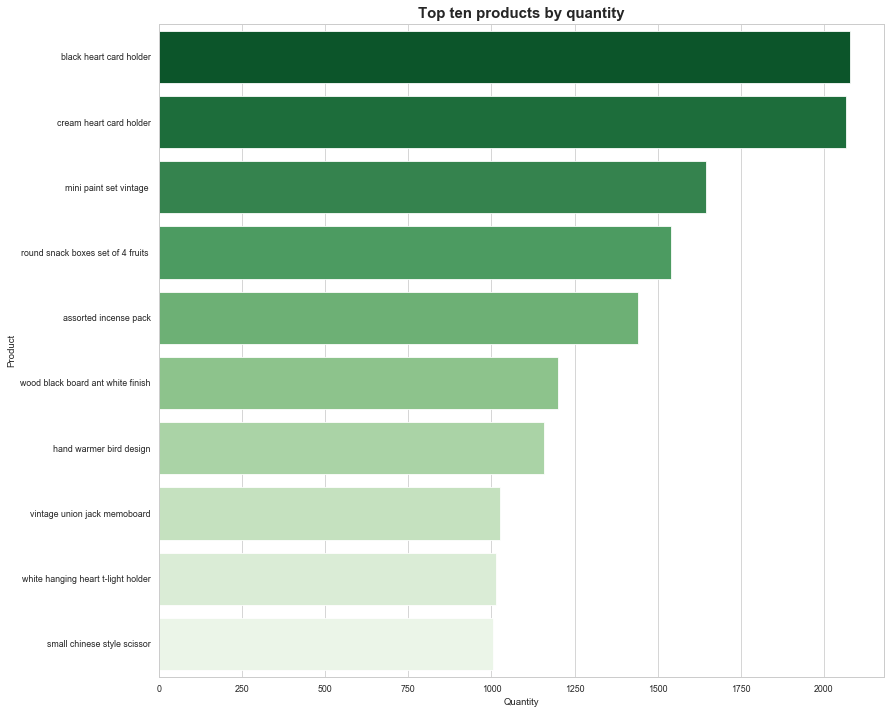

In [96]:
sns.set_context('paper')
sns.set_style('whitegrid')

plt.figure(figsize=(13,12))

sns.barplot(x= 'sum', y='description', data= top_10_products_quantity_2018, palette='Greens_r')

plt.title('Top ten products by quantity', fontsize=15, fontweight='bold')
plt.ylabel('Product')
plt.xlabel('Quantity')
plt.show()

### Conclusion
- The top item in quantity in 2019 winter was the popcorn holder with 40 orders and 3898 items sold
- The top item in quantity in 2018 winter was black heart card holder with 12 orders and 2078 items sold

### Find top products in price
<a id="topprice"></a>

## Winter 2019

In [97]:
top_10_products_price_2019= data_12_2019.groupby('description')['total_price'].sum()
top_10_products_price_2019.sort_values(ascending=False).head(10)

description
rabbit night light                 5416.40
black record cover frame           4765.55
metal sign take it or leave it     3967.20
regency cakestand 3 tier           3961.83
wall art keep calm                 3012.60
popcorn holder                     2895.90
alarm clock bakelike red           2890.14
paper chain kit 50's christmas     2790.62
antique heart shelf unit           2119.05
sweetheart bird house              2104.10
Name: total_price, dtype: float64

## Winter 2018

In [98]:
top_10_products_price_2018= data_2018_test.groupby('description')['total_price'].sum()
top_10_products_price_2018.sort_values(ascending=False).head(10)

description
vintage union jack memoboard          6620.09
regency cakestand 3 tier              5949.90
wood black board ant white finish     5879.28
black heart card holder               4881.70
cream heart card holder               4854.46
round snack boxes set of 4 fruits     3950.75
white hanging heart t-light holder    2732.35
utilty cabinet with hooks             2563.34
hall cabinet with 3 drawers           2403.63
box of vintage alphabet blocks        2331.05
Name: total_price, dtype: float64

- It looks like the top product in total price in Winter 2019 is the rabbit night light. With the top product in quantity, popcorn holder coming in at 6th
- In Winter 2018 the vintage union jack memoboard is the top product in total price with the top product in quantity, black heart card holder coming in 4th

### Find what the average price of product by category

## 2019 Winter

In [99]:
data_12_2019.groupby('product_category')['total_price'].mean().sort_values(ascending = False)

product_category
easter product        41.298333
clocks                38.754014
stationary            27.070709
decorations           24.942896
home and kitchen      23.052860
lunch box             22.810943
bottles               21.136960
cooking and baking    19.726307
other                 17.845975
bags                  15.677040
gardening product     13.181096
christmas product     12.445437
jewelry               11.749759
styling               10.707714
gifts                  9.857963
Name: total_price, dtype: float64

- Easter product has 41 average and has the least items sold as we saw beforehand. The more popular items have an average price of 22 by category.

## 2018 Winter

In [100]:
data_2018_test.groupby('product_category')['total_price'].mean().sort_values(ascending = False)

product_category
stationary            48.146834
home and kitchen      32.489813
gardening product     24.023462
bottles               23.431605
cooking and baking    21.210337
lunch box             20.675275
decorations           19.135362
bags                  17.691607
clocks                17.077019
other                 16.905972
easter product        14.092857
christmas product     12.988281
jewelry               11.527979
gifts                 10.280086
styling                8.484375
Name: total_price, dtype: float64

- Here we see the high average going to stationary products at 46 and home kitchen has a high average of 30. Easter product falls to 8 in 2018

## 2019

### Find top customers and what products are bought by those top customers

In [101]:
top_customer_quantity_2019 = data_12_2019.pivot_table(index = ['invoiceno'], values = 'quantity', aggfunc = ('count', 'sum'))
top_customer_quantity_2019.sort_values(by= 'count', ascending = False)

,count,sum
invoiceno,,
580727,528,2192
580956,183,698
581405,179,297
580632,141,495
580399,133,525
...,...,...
580885,1,72
581115,1,1404
581231,1,4


In [102]:
top_customer_price_2019 = data_12_2019.pivot_table(index = ['invoiceno'], values = 'total_price', aggfunc = ('count', 'sum'))
top_customer_price_2019.sort_values(by= 'count', ascending = False)

,count,sum
invoiceno,,
580727,528,7336.72
580956,183,969.01
581405,179,364.54
580632,141,762.94
580399,133,863.20
...,...,...
580885,1,356.40
581115,1,3861.00
581231,1,19.80


In [103]:
customer_580727 = data_12_2019.query('invoiceno == "580727"')
customer_580727.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,year,month,week,weekday,date,total_price,first_invoice_date,categories,lemmas,product_category
391428,580727,16225,rattle snake eggs,2,2019-12-03 17:17:00,3.29,14096,2019,12,49,1,2019-12-03,6.58,2019-08-28,[rattle snake eggs],"[rattle, snake, egg]",other
391429,580727,16238,party time pencil erasers,10,2019-12-03 17:17:00,0.42,14096,2019,12,49,1,2019-12-03,4.20,2019-08-28,[party time pencil erasers],"[party, time, pencil, eraser]",other
391430,580727,16258A,swirly circular rubbers in bag,3,2019-12-03 17:17:00,0.83,14096,2019,12,49,1,2019-12-03,2.49,2019-08-28,[circular rubbers],"[swirly, circular, rubber, in, bag]",bags
391431,580727,17003,brocade ring purse,1,2019-12-03 17:17:00,0.63,14096,2019,12,49,1,2019-12-03,0.63,2019-08-28,[brocade ring purse],"[brocade, ring, purse]",jewelry
391432,580727,20653,cherry blossom luggage tag,1,2019-12-03 17:17:00,2.46,14096,2019,12,49,1,2019-12-03,2.46,2019-08-28,[cherry blossom luggage tag],"[cherry, blossom, luggage, tag]",other


In [104]:
customer_580727['product_category'].value_counts()

other                 222
home and kitchen       82
cooking and baking     70
decorations            38
christmas product      29
bags                   24
stationary             23
jewelry                12
bottles                10
clocks                  6
lunch box               4
gifts                   4
styling                 3
gardening product       1
Name: product_category, dtype: int64

In [105]:
customer_580727['description'].value_counts()

button box                           2
set of 3 wooden heart decorations    2
pin cushion babushka pink            2
pizza plate in box                   2
queens guard coffee mug              1
                                    ..
sewing susan 21 needle set           1
pens assorted spaceball              1
set of 3 cake tins pantry design     1
lunch bag red retrospot              1
set/4 badges balloon girl            1
Name: description, Length: 524, dtype: int64

## 2018

In [106]:
top_customer_quantity_2018 = data_2018_test.pivot_table(index = ['invoiceno'], values = 'quantity', aggfunc = ('count', 'sum'))
top_customer_quantity_2018.sort_values(by= 'count', ascending = False)

,count,sum
invoiceno,,
537224,152,674
537781,136,246
537135,117,471
537126,117,211
537144,96,202
...,...,...
537461,1,120
537460,1,128
537198,1,10


In [107]:
top_customer_price_2018 = data_2018_test.pivot_table(index = ['invoiceno'], values = 'total_price', aggfunc = ('count', 'sum'))
top_customer_price_2018.sort_values(by= 'count', ascending = False)

,count,sum
invoiceno,,
537224,152,1369.06
537781,136,416.61
537135,117,722.36
537126,117,472.11
537144,96,329.03
...,...,...
537461,1,510.00
537460,1,326.40
537198,1,67.50


In [108]:
customer_537224 = data_2018_test.query('invoiceno == "537224"')
customer_537224.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,year,month,week,weekday,date,total_price,first_invoice_date,categories,lemmas,product_category
7404,537224,22829,sweetheart wire wall tidy,2,2018-12-03 16:24:00,9.95,13174,2018,12,49,0,2018-12-03,19.90,2018-12-03,[sweetheart wire wall tidy],"[sweetheart, wire, wall, tidy]",other
7405,537224,70007,hi tec alpine hand warmer,1,2018-12-03 16:24:00,1.65,13174,2018,12,49,0,2018-12-03,1.65,2018-12-03,[hi tec alpine hand warmer],"[hi, tec, alpine, hand, warmer]",other
7406,537224,84375,set of 20 kids cookie cutters,2,2018-12-03 16:24:00,2.10,13174,2018,12,49,0,2018-12-03,4.20,2018-12-03,[kids cookie cutters],"[set, of, 20, kid, cookie, cutter]",other
7407,537224,70006,love heart pocket warmer,1,2018-12-03 16:24:00,1.65,13174,2018,12,49,0,2018-12-03,1.65,2018-12-03,[heart pocket warmer],"[love, heart, pocket, warmer]",other
7408,537224,85025C,pink heart shape photo frame,1,2018-12-03 16:24:00,1.65,13174,2018,12,49,0,2018-12-03,1.65,2018-12-03,[pink heart shape photo frame],"[pink, heart, shape, photo, frame]",stationary


In [109]:
customer_537224['product_category'].value_counts()

other                 41
home and kitchen      38
christmas product     23
decorations           19
bottles                8
stationary             8
cooking and baking     7
styling                6
clocks                 1
jewelry                1
Name: product_category, dtype: int64

In [110]:
customer_537224['description'].value_counts()

white christmas star decoration      3
paper bunting white lace             3
grey heart hot water bottle          2
cinammon & orange wreath             2
christmas retrospot tree wood        2
                                    ..
fawn blue hot water bottle           1
hanging heart zinc t-light holder    1
love large wood letters              1
christmas craft tree top angel       1
way out metal sign                   1
Name: description, Length: 122, dtype: int64

## Conclusions
<a id="conclusion2"></a>

-  Disregarding the other category the top two categories in our store are home and kitchen and cooking and baking. Decorations and Christmas product are after those.
- Our top product for the year 2018 was a card holder in quantity and in 2019 a popcorn holder. 
- The categories did not really change much except that 2019 had more quantity of items bought
- 2019 top product in total price was a rabbit night light and 2018's top product in price was a vintage union jack memoboard.
- The two top items in quantity were in 4th and 6th in total price
- Their were two different top customers for 2018 and 2019
- For 2019 it was Customer 14096 and for 2018 it was 13174.
- The customer in 2018 had a total price of 1369.06 of items and the customer in 2019 had 7336.72. 
- Looking at this information we can say that the holder items are something to keep in stock for the future. We should always have decorations and christmas products on hand during the Winter season but know that home and kitchen and cooking and baking will probably continue to be a top priority for our customers.
- Also our top customer may have changed by the year but we definitely see a nice change in pricing and quantity in 2019. 

# Step 4: Customer distribution, revenue, LTV
<a id="step4"></a>

### Top customers of December 2019 and distribution of products they bought
<a id="distribute2019"></a>

In [111]:
#top_customers_12_2019 = data_12_2019['customerid'].value_counts().head()
#top_customers_12_2019

In [112]:
top_customers_12_2019 = data_12_2019.groupby(['customerid']).agg({'invoiceno':'nunique'}).reset_index()
top_customers_12_2019.sort_values(by= 'invoiceno', ascending= False).head()

,customerid,invoiceno
217,14911,7
36,12748,7
109,13685,4
16,12569,4
192,14646,3


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000025A29AC5588>],
      dtype=object)

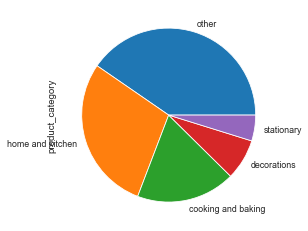

In [113]:
distribution_14911 = data_12_2019.query('customerid == "14911"')
(distribution_14911['product_category'].value_counts().head()).plot(subplots=True, kind='pie')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000025A2A9A2648>],
      dtype=object)

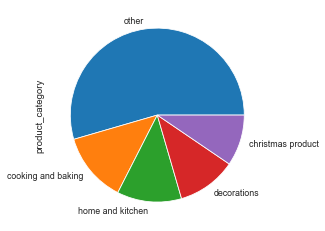

In [114]:
distribution_12748 = data_12_2019.query('customerid == "12748"')
(distribution_12748['product_category'].value_counts().head()).plot(subplots=True, kind='pie')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000025A3482DE88>],
      dtype=object)

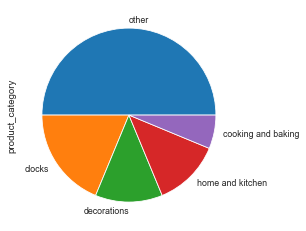

In [115]:
distribution_13685 = data_12_2019.query('customerid == "13685"')
(distribution_13685['product_category'].value_counts().head()).plot(subplots=True, kind='pie')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000025A2AA4B4C8>],
      dtype=object)

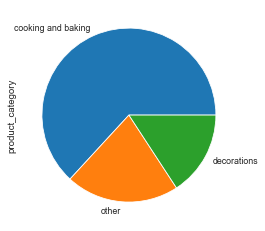

In [116]:
distribution_12569 = data_12_2019.query('customerid == "12569"')
(distribution_12569['product_category'].value_counts().head()).plot(subplots=True, kind='pie')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000025A2AA97408>],
      dtype=object)

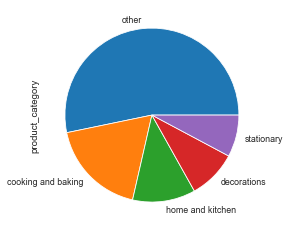

In [117]:
distribution_14646 = data_12_2019.query('customerid == "14646"')
(distribution_14646['product_category'].value_counts().head()).plot(subplots=True, kind='pie')

### Top customers of December 2018 and distribution of products they bought
<a id="distribute2018"></a>

In [118]:
#top_customers_12_2018 = data_2018_test['customerid'].value_counts().head()
#top_customers_12_2018

In [119]:
top_customers_12_2018 = data_2018_test.groupby(['customerid']).agg({'invoiceno':'nunique'}).reset_index()
top_customers_12_2018.sort_values(by= 'invoiceno', ascending= False).head()

,customerid,invoiceno
25,12748,15
164,14911,5
195,15332,4
373,17677,4
415,18102,4


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000025A2AAEF4C8>],
      dtype=object)

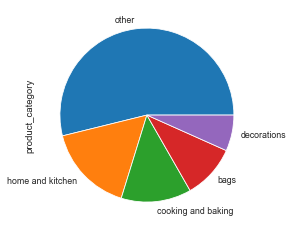

In [120]:
distribution_12748 = data_2018_test.query('customerid == "12748"')
(distribution_12748['product_category'].value_counts().head()).plot(subplots=True, kind='pie')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000025A2AB48A88>],
      dtype=object)

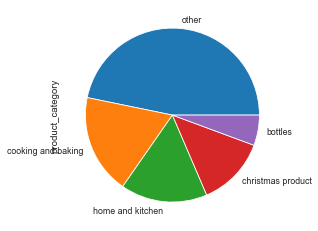

In [121]:
distribution_14911 = data_2018_test.query('customerid == "14911"')
(distribution_14911['product_category'].value_counts().head()).plot(subplots=True, kind='pie')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000025A2AB9CB08>],
      dtype=object)

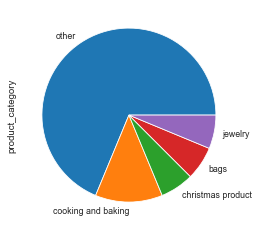

In [122]:
distribution_15332 = data_2018_test.query('customerid == "15332"')
(distribution_15332['product_category'].value_counts().head()).plot(subplots=True, kind='pie')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000025A2ABF28C8>],
      dtype=object)

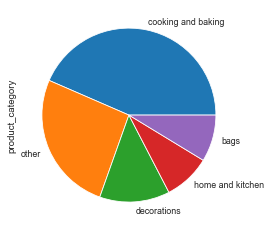

In [123]:
distribution_17677 = data_2018_test.query('customerid == "17677"')
(distribution_17677['product_category'].value_counts().head()).plot(subplots=True, kind='pie')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000025A2AC46A08>],
      dtype=object)

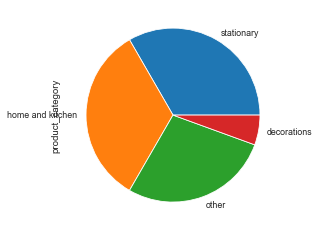

In [124]:
distribution_18102 = data_2018_test.query('customerid == "18102"')
(distribution_18102['product_category'].value_counts().head()).plot(subplots=True, kind='pie')

- We see that some top customers are found in both years. Loyal customer. For example Customer 14911 and Customer 12748.
- Almost all of these customers have either home and kitchen or cooking and baking as their first or second largest product that they ordered.
- Only customer 14562 has decorations and bottles before home and kitchen but he does have home and kitchen as part of his top category choice

### Check if product quantity changed over time in orders
<a id="overtime"></a>

In [125]:
product_black_heart = data_clean.query('description == "black heart card holder"')

In [126]:
product_black_heart.head(1)

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,year,month,week,weekday,date,total_price,first_invoice_date,categories,lemmas,product_category
263,536395,22188,black heart card holder,8,2018-11-29 10:47:00,3.95,13767,2018,11,48,3,2018-11-29,31.6,2018-11-29,[black heart card holder],"[black, heart, card, holder]",stationary


In [127]:
popcorn_holder = data_clean.query('description == "popcorn holder"')

In [128]:
popcorn_holder.head(1)

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,year,month,week,weekday,date,total_price,first_invoice_date,categories,lemmas,product_category
157035,556474,22197,popcorn holder,2,2019-06-10 12:01:00,0.85,16007,2019,6,24,0,2019-06-10,1.7,2019-05-06,[popcorn holder],"[popcorn, holder]",other


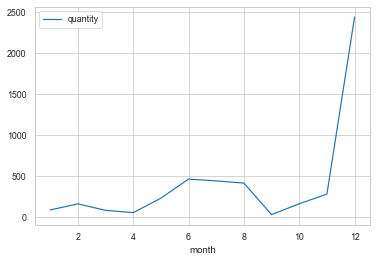

In [129]:
quantity_count_bh = product_black_heart.groupby('month').agg({'quantity': 'sum'}).plot()
#print(product_black_heart.sort_values(by = 'quantity', ascending=False))

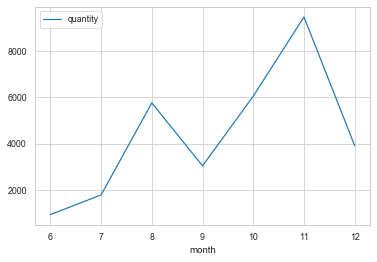

In [130]:
quantity_count_ph = popcorn_holder.groupby('month').agg({'quantity': 'sum'}).plot()

- The top items in 2018 and 2019 both look to be good sellers for the December holiday. However popcorn holder looks to be the clear winner in amounts and also does well throughout the year.

#### 1. How many people on average bought a product each day, week, and month? 

In [131]:
dau_total = data_clean.groupby('date').agg({'customerid': 'nunique'}).mean()
print(int(dau_total))

54


In [132]:
wau_total = data_clean.groupby(['year', 'week']).agg({'customerid': 'nunique'}).mean()
print(int(wau_total))

299


In [133]:
#How many use it every month on average
mau_total = data_clean.groupby(['year', 'month']).agg({'customerid': 'nunique'}).mean()
print(int(mau_total))

930


In [134]:
dau_total = data_clean.groupby('date').agg({'customerid': 'nunique'}).mean()
wau_total = data_clean.groupby(['year', 'week']).agg({'customerid': 'nunique'}).mean()
mau_total = data_clean.groupby(['year', 'month']).agg({'customerid': 'nunique'}).mean()

sticky_wau = (dau_total/wau_total)*100
sticky_mau = (dau_total/mau_total)*100

print(sticky_wau)
print(sticky_mau)

customerid    18.292208
dtype: float64
customerid    5.882205
dtype: float64


In [135]:
dau_total = data_2019.groupby('date').agg({'customerid': 'nunique'}).mean()
wau_total = data_2019.groupby(['year', 'week']).agg({'customerid': 'nunique'}).mean()
mau_total = data_2019.groupby(['year', 'month']).agg({'customerid': 'nunique'}).mean()

sticky_wau = (dau_total/wau_total)*100
sticky_mau = (dau_total/mau_total)*100

print(sticky_wau)
print(sticky_mau)

customerid    18.068092
dtype: float64
customerid    5.402718
dtype: float64


### Total revenue
<a id="revenue"></a>

In [136]:
data_clean['total_price'].sum()

8575609.044

In [137]:
data_2019['total_price'].sum()

8009844.483999999

In [138]:
data_12_2019['total_price'].sum()

255659.65000000002

In [139]:
data_2018_test['total_price'].sum()

215302.25999999998

- 2019 has the better profit during the December time period that we investigated. However judging by these number 2018 had a good December 

In [140]:
8575609.044 - 8009844.483999999

565764.5600000005

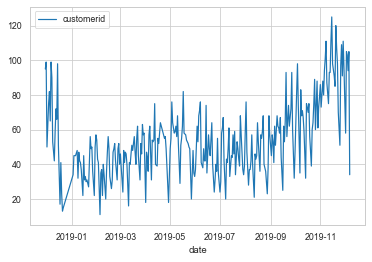

In [141]:
customer_count_day = data_clean.groupby('date').agg({'customerid': 'nunique'}).plot()
#print(data_clean.sort_values(by = 'customerid', ascending=False))

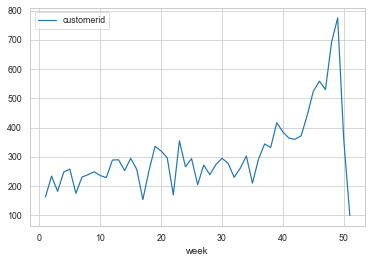

In [142]:
customer_count_week = data_clean.groupby('week').agg({'customerid': 'nunique'}).plot()
#print(data_clean.sort_values(by = 'customerid', ascending=False))

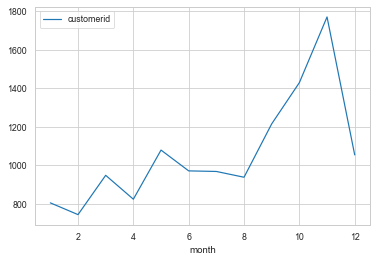

In [143]:
users_count_month = data_clean.groupby('month').agg({'customerid': 'nunique'}).plot()
#print(data_clean.sort_values(by = 'customerid', ascending=False))

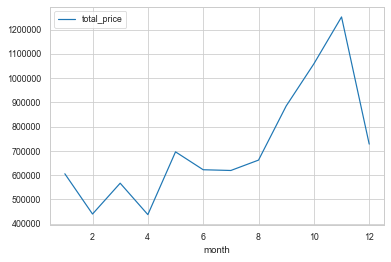

In [144]:
data_clean.groupby('month').agg({'total_price': 'sum'}).plot()

- The daily amount of customers fluctuated but remained pretty constant peaked in October and our winter seasons looked very strong
- The weekly data shows a rise in customers throughout, peeking towards the end and then dropping because our data ends
- Same shows with our months where we see a slow rise and then some steadiness and then we see a sharp curve going from August into Winter.
- The revenue change over time is very similar to our customer count. 

### Check LTV
<a id="ltv"></a>

In [145]:
first_invoice_date_by_customers = data_clean.groupby('customerid')['invoicedate'].min() 

In [146]:
data_clean['first_order_month'] = data_clean['first_invoice_date'].astype('datetime64[M]')

In [147]:
data_clean['order_month'] = data_clean['invoicedate'].astype('datetime64[M]')

In [148]:
data_clean['order_month']

0        2018-11-01
1        2018-11-01
2        2018-11-01
3        2018-11-01
4        2018-11-01
            ...    
399927   2019-12-01
399928   2019-12-01
399929   2019-12-01
399930   2019-12-01
399931   2019-12-01
Name: order_month, Length: 391331, dtype: datetime64[ns]

In [149]:
cohort_grouped = data_clean.groupby('order_month').agg({'customerid':'nunique','total_price':'sum'}).reset_index()
print(cohort_grouped)

   order_month  customerid  total_price
0   2018-11-01         188    93264.860
1   2018-12-01         768   472499.700
2   2019-01-01         806   605970.760
3   2019-02-01         745   440108.970
4   2019-03-01         949   567129.920
5   2019-04-01         825   437695.691
6   2019-05-01        1080   696207.730
7   2019-06-01         972   622528.010
8   2019-07-01         969   619510.521
9   2019-08-01         939   662247.640
10  2019-09-01        1216   885281.182
11  2019-10-01        1430  1058828.580
12  2019-11-01        1674  1158675.830
13  2019-12-01         463   255659.650


In [150]:
orders_grouped_by_cohorts = data_clean.groupby(['first_order_month','order_month']).agg({'total_price':'sum','customerid':'nunique'}).reset_index()
print(orders_grouped_by_cohorts.head())

  first_order_month order_month  total_price  customerid
0        2018-11-01  2018-11-01     93264.86         188
1        2018-11-01  2018-12-01     85290.71          71
2        2018-11-01  2019-01-01     70720.09          68
3        2018-11-01  2019-02-01     51301.64          62
4        2018-11-01  2019-03-01     73701.90          68


In [151]:
orders_grouped_by_cohorts['cohort_lifetime'] = orders_grouped_by_cohorts['order_month'] - orders_grouped_by_cohorts['first_order_month']

In [152]:
orders_grouped_by_cohorts['cohort_lifetime'] = orders_grouped_by_cohorts['cohort_lifetime'] / np.timedelta64(1,'M')
print(orders_grouped_by_cohorts['cohort_lifetime'].head())

0    0.000000
1    0.985647
2    2.004148
3    3.022649
4    3.942586
Name: cohort_lifetime, dtype: float64


In [153]:
orders_grouped_by_cohorts['cohort_lifetime'] = orders_grouped_by_cohorts['cohort_lifetime'].round().astype('int')
print(orders_grouped_by_cohorts[['first_order_month','order_month','cohort_lifetime']].head())
print(orders_grouped_by_cohorts[['first_order_month','order_month','cohort_lifetime']].tail())

  first_order_month order_month  cohort_lifetime
0        2018-11-01  2018-11-01                0
1        2018-11-01  2018-12-01                1
2        2018-11-01  2019-01-01                2
3        2018-11-01  2019-02-01                3
4        2018-11-01  2019-03-01                4
    first_order_month order_month  cohort_lifetime
100        2019-10-01  2019-11-01                1
101        2019-10-01  2019-12-01                2
102        2019-11-01  2019-11-01                0
103        2019-11-01  2019-12-01                1
104        2019-12-01  2019-12-01                0


In [154]:
orders_grouped_by_cohorts['first_order_month'].dt.strftime('%d.%m.%Y')
orders_grouped_by_cohorts['first_order_month'] = orders_grouped_by_cohorts['first_order_month'].dt.strftime('%Y-%m')
orders_grouped_by_cohorts.head()

,first_order_month,order_month,total_price,customerid,cohort_lifetime
0,2018-11,2018-11-01,93264.86,188,0
1,2018-11,2018-12-01,85290.71,71,1
2,2018-11,2019-01-01,70720.09,68,2
3,2018-11,2019-02-01,51301.64,62,3
4,2018-11,2019-03-01,73701.90,68,4


#### 3. What is the average purchase size?

In [155]:
orders_grouped_by_cohorts['revenue_per_user'] = orders_grouped_by_cohorts['total_price'] / orders_grouped_by_cohorts['customerid']

In [156]:
revenue_per_user_pivot = orders_grouped_by_cohorts.pivot_table(index='first_order_month',columns ='cohort_lifetime',values='revenue_per_user',aggfunc='mean')

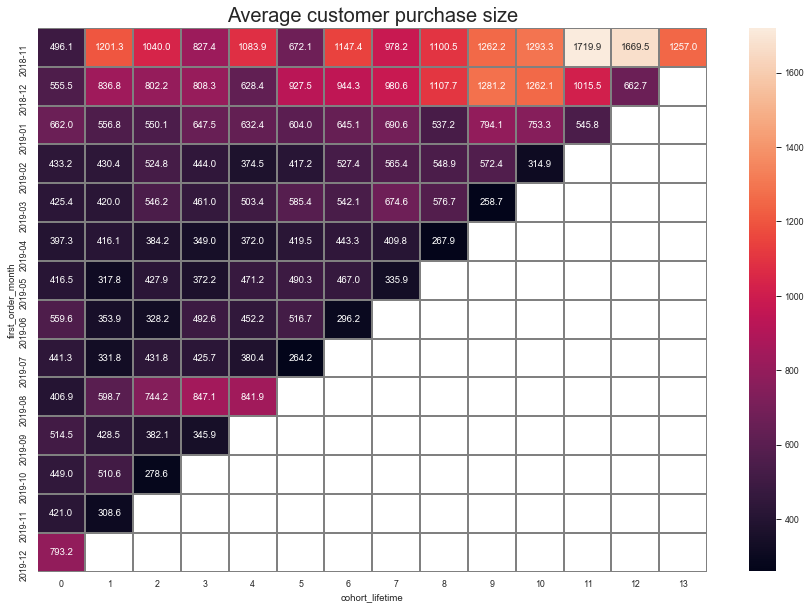

In [157]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(15, 10))
plt.title('Average customer purchase size', fontsize=20)
sns.heatmap(revenue_per_user_pivot, annot=True, fmt='.1f', linewidths=1, linecolor='gray')

- Well it looks like there was loyal customers. The first cohort stayed pretty strong throughout. The 2nd cohort looks like it is a summer group. The time period leading up to Christmas season was very good.

#### 4. How much money do they bring? (LTV)

In [158]:
cohort_sizes = data_clean.groupby('first_order_month').agg({'customerid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'customerid']
cohort_sizes

,first_order_month,customerid
0,2018-11-01,188
1,2018-12-01,697
2,2019-01-01,471
3,2019-02-01,368
4,2019-03-01,425
5,2019-04-01,288
6,2019-05-01,297
7,2019-06-01,230
8,2019-07-01,202
9,2019-08-01,164


In [159]:
orders_ = pd.merge(data_clean,first_invoice_date_by_customers, on='customerid')
cohorts = orders_.groupby(['first_order_month','order_month']).agg({'total_price': 'sum'}).reset_index()
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')

In [160]:
report['gp'] = report['total_price'] 
report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

In [161]:
report['ltv'] = report['gp'] / report['customerid']

In [162]:
report

,first_order_month,customerid,order_month,total_price,gp,age,ltv
0,2018-11-01,188,2018-11-01,93264.86,93264.86,0,496.089681
1,2018-11-01,188,2018-12-01,85290.71,85290.71,1,453.673989
2,2018-11-01,188,2019-01-01,70720.09,70720.09,2,376.170691
3,2018-11-01,188,2019-02-01,51301.64,51301.64,3,272.881064
4,2018-11-01,188,2019-03-01,73701.90,73701.90,4,392.031383
...,...,...,...,...,...,...,...
100,2019-10-01,380,2019-11-01,46971.26,46971.26,1,123.608579
101,2019-10-01,380,2019-12-01,10029.81,10029.81,2,26.394237
102,2019-11-01,306,2019-11-01,128836.31,128836.31,0,421.033693
103,2019-11-01,306,2019-12-01,5863.47,5863.47,1,19.161667


In [163]:
report.groupby('age')['total_price'].sum()

age
0     2127974.803
1      582922.510
2      559696.130
3      561251.990
4      512367.530
5      567955.120
6      566863.050
7      557193.020
8      535644.301
9      614971.270
10     582748.050
11     513211.210
12     251329.600
13      41480.460
Name: total_price, dtype: float64

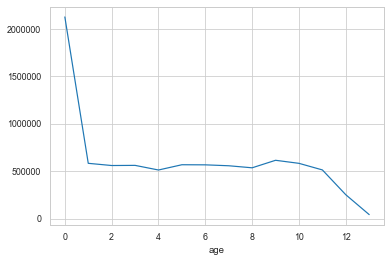

In [164]:
report.groupby('age')['total_price'].sum().plot()

In [165]:
report.groupby('age')['ltv'].sum()

age
0     6971.682656
1     1636.042755
2     1635.596932
3     1588.085384
4     1476.381120
5     1385.432221
6     1453.268677
7     1338.620552
8     1218.212364
9     1391.709053
10    1303.886343
11    1231.617408
12     950.737572
13     220.640745
Name: ltv, dtype: float64

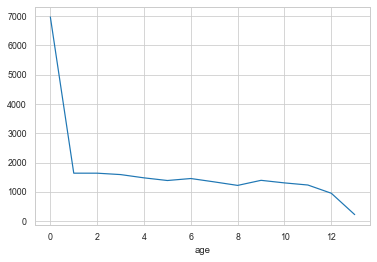

In [166]:
report.groupby('age')['ltv'].sum().plot()

- We started off strong and then it was pretty steady for the whole period. There is a drop off at the end but that is because there isn't a complete month there.

# Step 5: Hypothesis testing
<a id="statdiff"></a>
- Check if there is any statistical difference between the average profit of product categories of Home and Kitchen and Cooking and Baking that were determined best for holidays for 2018 and 2019 Holiday season.

- The average profit from users in 2018 is different from that of the users from 2019.

## Comparing 2018 and 2019 revenue and orders

### Mann Whitney with average revenue and average order size 2018 vs. 2019

In [167]:
ordersByUsers2018 = data_2018_test.groupby('customerid', as_index=False).agg({'invoiceno' : pd.Series.nunique})
ordersByUsers2018.columns = ['customerid', 'orders']

In [168]:
ordersByUsers2019 = data_12_2019.groupby('customerid', as_index=False).agg({'invoiceno' : pd.Series.nunique})
ordersByUsers2019.columns = ['customerid', 'orders'] 

In [169]:
dates2018 = data_2018_test[['date']].drop_duplicates()

In [170]:
dates2019 = data_12_2019[['date']].drop_duplicates()

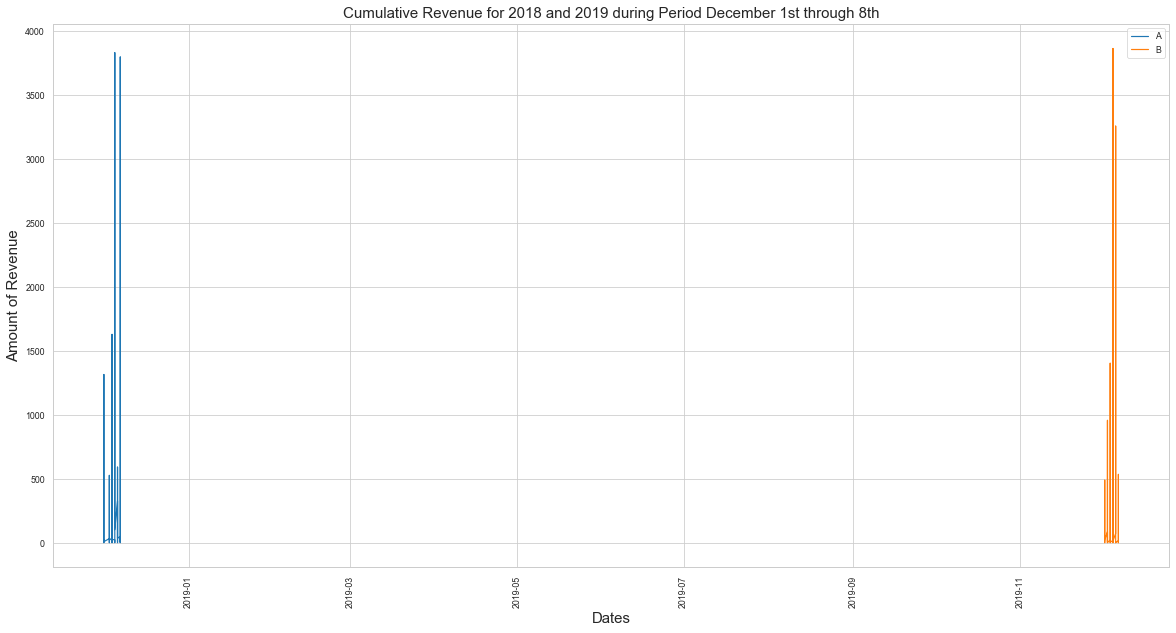

In [171]:
#DataFrame with cumulative orders and cumulative revenue by day, group A
cumulativeRevenueA = data_2018_test[['date','total_price', 'invoiceno']]

# DataFrame with cumulative orders and cumulative revenue by day, group B
cumulativeRevenueB = data_12_2019[['date','total_price', 'invoiceno']]


#Increasing size of graph and rotating axis
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.title('Cumulative Revenue for 2018 and 2019 during Period December 1st through 8th', fontdict={'size':15})
plt.ylabel('Amount of Revenue', fontdict={'size': 15})
plt.xlabel('Dates', fontdict={'size': 15})

# Plotting the group A revenue graph 
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['total_price'], label='A')

# Plotting the group B revenue graph 
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['total_price'], label='B')


plt.legend() 

- We can see that the revenue is very similar in its peak

In [172]:
ordersByUsers2018 = data_2018_test.drop(['total_price', 'date'], axis=1).groupby('customerid', as_index=False).agg({'invoiceno' : pd.Series.nunique})

ordersByUsers2018.columns = ['customerid','orders']

In [173]:
ordersByUsers2019 = data_12_2019.drop(['total_price', 'date'], axis=1).groupby('customerid', as_index=False).agg({'invoiceno' : pd.Series.nunique})

ordersByUsers2019.columns = ['customerid','orders']

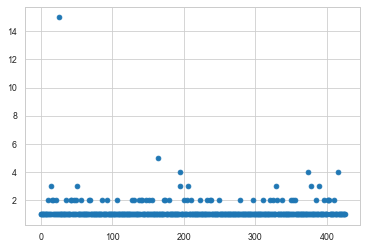

In [174]:
x_values2018 = pd.Series(range(0, len(ordersByUsers2018['orders'])))
plt.scatter(x_values2018, ordersByUsers2018['orders']) 

In [175]:
print(np.percentile(ordersByUsers2018['orders'], [90, 95, 99]))

[2.   2.   3.75]


- Most users made 2 to 3 orders. We have one user who made more than 14 in 2018

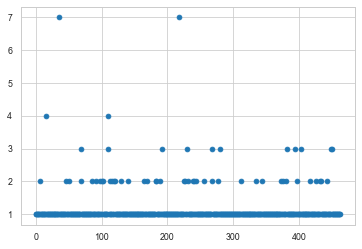

In [176]:
x_values2019 = pd.Series(range(0, len(ordersByUsers2019['orders'])))
plt.scatter(x_values2019, ordersByUsers2019['orders']) 

In [177]:
print(np.percentile(ordersByUsers2019['orders'], [90, 95, 99]))

[2. 2. 3.]


- In 2019 most users also made between 2 to 3 orders. None reachd 14 orders but two got to 7

- But the amounts do look very similar

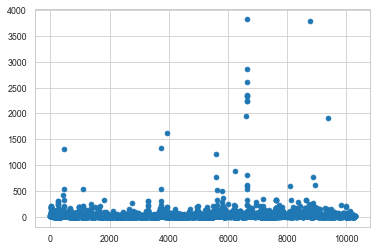

In [178]:
x_valuesprice2018 = pd.Series(range(0, len(data_2018_test['total_price'])))
plt.scatter(x_valuesprice2018, data_2018_test['total_price']) 

In [179]:
print(np.percentile(data_2018_test['total_price'], [90, 95, 99]))

[ 34.65  59.8  177.6 ]


- We have a few outliers in total price in 2018 but most orders were below 500

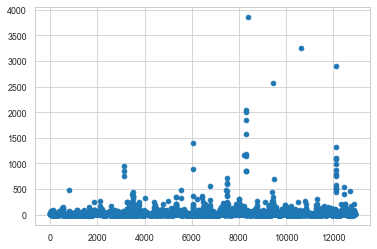

In [180]:
x_valuesprice2019 = pd.Series(range(0, len(data_12_2019['total_price'])))
plt.scatter(x_valuesprice2019, data_12_2019['total_price']) 

In [181]:
print(np.percentile(data_12_2019['total_price'], [90, 95, 99]))

[ 33.2  59.4 179. ]


- Same in 2019. Most orders were below 500. We even see very similar price points. And nothing went over 4000 in both years

In [182]:
sampleA = pd.concat([ordersByUsers2018['orders'],pd.Series(0, index=np.arange(data_2018_test['customerid'].count() - len(ordersByUsers2018['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsers2019['orders'],pd.Series(0, index=np.arange(data_12_2019['customerid'].count() - len(ordersByUsers2019['orders'])), name='orders')],axis=0)

print("{0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1)) 

0.013
-0.163


- The first row of the output gives us the p-value, 0.013, which is less than 0.05 which is our Alpha. So we will need to reject the null hypothesis that there's not a statistically significant difference in conversion between the groups. And the relative gain of 2019 is -16%.

- Our H0 is that 2018 and 2019 are statistically equal in their average order size using the data.
- Our H1 is that 2018 and 2019 are statistically different in their average order size using the data
- I will choose to use the significance level of Alpha at 0.05 which is what we have been using in our projects and which the common significance level to use.

In [183]:
print("{0:.5f}".format(st.mannwhitneyu(data_2018_test['total_price'], data_12_2019['total_price'])[1]))
print("{0:.5f}".format(data_2018_test['total_price'].mean()/data_12_2019['total_price'].mean()-1)) 

0.00000
0.05848


- The p-value is at 0, so there is definitely a reason to reject the null hypothesis.
- Therefore we can conclude that average order size is not statistically equal between years. 

## Checking distribution

In [184]:
x = sns.distplot(home_kitchen_2019['total_price'],
                  kde=True,
                  bins=100,
                  color='skyblue',)

NameError: name 'home_kitchen_2019' is not defined

In [ ]:
x = sns.distplot(cooking_and_baking_2019['total_price'],
                  kde=True,
                  bins=100,
                  color='skyblue',)

In [ ]:
x = sns.distplot(home_kitchen_2018['total_price'],
                  kde=True,
                  bins=100,
                  color='skyblue',)

In [ ]:
x = sns.distplot(cooking_and_baking_2018['total_price'],
                  kde=True,
                  bins=100,
                  color='skyblue',)

- We can see that all of these are right skewed graphs but are all similar in that way. And based on the test beforehand we will do the T test

## T Test hypothesis

In [ ]:
home_kitchen_2019 = data_12_2019.query('product_category == "home and kitchen"')
home_kitchen_2018 = data_2018_test.query('product_category == "home and kitchen"')
cooking_and_baking_2019 = data_12_2019.query('product_category == "cooking and baking"')
cooking_and_baking_2018 = data_2018_test.query('product_category == "cooking and baking"')

In [ ]:
# Testing hypothesis of: The average profit for home and kitchen category from Christmas season 2018 and Christmas season 2019
#does not differ

print('mean 2018: ',pd.Series(home_kitchen_2019['total_price']).mean())
print('mean 2019: ',pd.Series(home_kitchen_2018['total_price']).mean())

alpha = 0.05 


results = st.ttest_ind(home_kitchen_2019['total_price'], home_kitchen_2018['total_price'])

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

- We can say here that the category of home kitchen in 2019 and 2018 are different statistically.

In [ ]:
# Testing hypothesis of: The average profit from Christmas season cooking and baking category 2018 
#and Christmas season cooking and baking 2019 does not differ

print('mean 2018: ',pd.Series(cooking_and_baking_2018['total_price']).mean())
print('mean 2019: ',pd.Series(cooking_and_baking_2019['total_price']).mean())

alpha = 0.05 


results = st.ttest_ind(cooking_and_baking_2018['total_price'], cooking_and_baking_2019['total_price'])

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

- We can see from here that there is a probability that the average profit for the cooking and baking category in 2018 is similar to the average profit of the 2019 cooking and baking category 

In [ ]:
# Testing hypothesis of: The average price of products that were determined best for holidays for 2018 and 2019 Holiday season does not differ

alpha = 0.05 

results = st.ttest_ind(data_12_2019['total_price'], data_2018_test['total_price'])

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

- And here we can say with some probability that the average total price for 2018 and 2019 are similar

# Step 6: Conclusion
<a id="finalconclusion"></a>

- The 2018 and 2019 Christmas seasons are similar.
- The customers that started in 2018 stayed loyal throughout the year and bought well again next season
- Home and Kitchen products and baking and cooking products are the most popular
- Though when it comes to actual top products during the Christmas season it was card holders or a popcorn holder which are part of stationary or other categories
- The revenue for each month was similar with only a week of 2019 being recorded. at 250000 for 2019 and 209000 for 2018 in the period that we checked. 2019 may come out the winner.
- Each customer had a different arrangement of what the bought but most were consistent with Home and kitchen products on top or cooking and baking products

# Presentation
<a id="presentation"></a>

https://docs.google.com/presentation/d/1JPh5BDi55AB_ygabj5tvwwYUtEF7MRRnH3j_UmpwN1Q/edit?usp=sharing

## Sources

https://www.datasciencemadesimple.com/drop-delete-rows-conditions-python-pandas/

http://www.nltk.org/api/nltk.tag.html#nltk.tag.pos_tag_sents

https://www.etsy.com/il-en/c/jewelry-and-accessories?ref=catnav-10855

https://www.amazon.com/

https://www.geeksforgeeks.org/python-find-the-list-elements-starting-with-specific-letter/

https://stackoverflow.com/questions/33587667/extracting-all-nouns-from-a-text-file-using-nltk

